In [1]:
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 8)})

In [2]:
#### Reading the datasets
data = pd.read_csv("E:/Freelance Projects/Coding with Jupeter Notebook for Data Science assignment/11. Neural Networks/gas_turbines.csv")

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


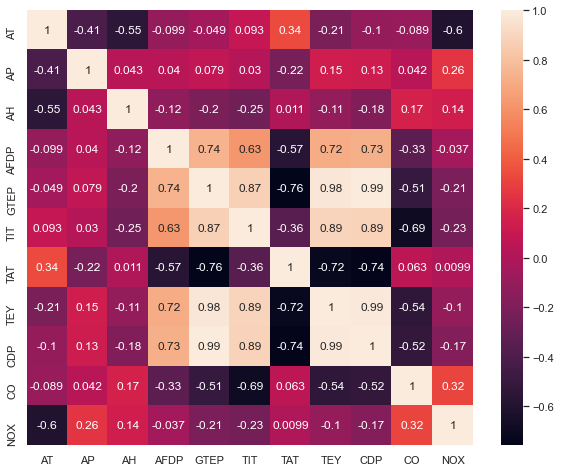

In [4]:
#### Exploratory Data Analysis
fig = sns.heatmap(data.corr(), annot = True)

In [5]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [6]:
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO','NOX']]
X.shape

(15039, 10)

In [7]:
y = data['TEY']
y.shape

(15039,)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
###### Scaling the Data
sc = StandardScaler()   ### 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train

array([[ 0.09064825, -0.46034064,  0.93269519, ..., -1.37938636,
         0.19390583, -0.74980549],
       [-1.37711607,  1.71168127, -0.47586479, ...,  1.83720977,
        -0.68140743, -0.31903163],
       [-1.04551275, -1.17913925,  1.35013747, ...,  1.42049579,
        -0.6524709 ,  0.20584473],
       ...,
       [-0.18703153,  0.25845798, -0.21689999, ..., -1.51738315,
         1.64099971, -0.01045629],
       [-1.63925319,  0.539727  ,  0.66649068, ..., -1.46926585,
         1.43406186,  4.37868389],
       [-1.55453509,  2.07108058,  0.27663174, ..., -0.37981754,
         0.10733252,  1.2320237 ]])

In [10]:
model = Sequential()

In [11]:
#### Adding the Input Layer
model.add(Dense(units = 10,activation = 'relu'))

In [12]:
#### Adding the 1st Hidden layer
model.add(Dense(units = 7, activation = 'relu'))

In [13]:
#### Adding the 2nd Hidden layer
model.add(Dense(units = 6, activation = 'relu'))

In [14]:
### Adding the output Layer
model.add(Dense(1,activation = 'relu'))

In [36]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics= ['mean_squared_error'])

In [37]:
model_his = model.fit(X_train,y_train,validation_split=0.1,epochs=50)

Epoch 1/50
297/297 [==============================] - 1s 2ms/step - loss: 0.5005 - mean_squared_error: 0.4981 - val_loss: 0.4911 - val_mean_squared_error: 0.4654
Epoch 2/50
297/297 [==============================] - 0s 1ms/step - loss: 0.5079 - mean_squared_error: 0.5059 - val_loss: 0.6184 - val_mean_squared_error: 0.6687
Epoch 3/50
297/297 [==============================] - 0s 1ms/step - loss: 0.5001 - mean_squared_error: 0.4963 - val_loss: 0.5475 - val_mean_squared_error: 0.5408
Epoch 4/50
297/297 [==============================] - 0s 1ms/step - loss: 0.5038 - mean_squared_error: 0.5044 - val_loss: 0.5672 - val_mean_squared_error: 0.6163
Epoch 5/50
297/297 [==============================] - 0s 1ms/step - loss: 0.5128 - mean_squared_error: 0.5110 - val_loss: 0.5014 - val_mean_squared_error: 0.5067
Epoch 6/50
297/297 [==============================] - 0s 1ms/step - loss: 0.5043 - mean_squared_error: 0.5062 - val_loss: 0.4752 - val_mean_squared_error: 0.4413
Epoch 7/50
297/297 [========

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([[134.78792],
       [112.57276],
       [134.45706],
       ...,
       [155.9103 ],
       [133.71655],
       [156.60248]], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score